# Proyecto 1A: Colorizando una colección de fotos
![](image1.jpg)

## Introducción
Sergei Mikhailovich Prokudin-Gorskii (1863-1944) fue un hombre muy adelantado a su tiempo. Convencido, ya en 1907, de que la fotografía en color era el futuro, ganó el permiso especial de Tzar para viajar a través del vasto Imperio Ruso y tomar fotografías en color de todo lo que vio, incluido el único retrato en color de León Tolstoi. Y realmente lo fotografió todo: personas, edificios, paisajes, vías férreas, puentes, etc. ¡miles de fotografías en color! Su idea era simple: grabar tres exposiciones de cada escena en una placa de vidrio usando un filtro rojo, verde y azul. No importa que no hubiera forma de imprimir fotografías en color hasta mucho más tarde; él imaginó proyectores especiales para ser instalados en aulas "multimedia" en toda Rusia donde los niños pudieran aprender sobre su vasto país. Por desgracia, sus planes nunca se materializaron: dejó Rusia en 1918, justo después de la revolución, para no volver nunca más. Afortunadamente, sus negativos de placa de vidrio RGB, que capturan los últimos años del Imperio ruso, sobrevivieron y fueron comprados en 1948 por la Biblioteca del Congreso de Estados Unidos. La Librería ha digitalizado recientemente los negativos y los ha puesto a disposición en línea.

## Objetivo
El objetivo de este proyecto es tomar las imágenes digitalizadas en la placa de vidrio Prokudin-Gorskii y, utilizando técnicas de procesamiento de imágenes, producir automáticamente una imagen en color con la menor cantidad posible de artefactos visuales. Para hacer esto, deberá extraer las imágenes de los tres canales de color, colocarlas una encima de la otra y alinearlas para que formen una única imagen de color RGB. 

Una explicación interesante sobre cómo la Biblioteca del Congreso de Estados Unidos (LoC) creó las imágenes en color en su sitio está disponible [aquí](http://www.loc.gov/exhibits/empire/making.html).

Un ejemplo de código en python se encuentra en el archivo de `colorizar.py`.  Supondremos que un modelo de traslación x, y simple es suficiente para una alineación adecuada. Sin embargo, las imágenes de la placa de vidrio de tamaño completo son muy grandes, por lo que su procedimiento de alineación deberá ser relativamente rápido y eficiente.

## Implementación

Algunas de las imágenes de placas de vidrio digitalizadas (versiones de alta y baja resolución) se encuentran en [este directorio de imágenes](https://uredu-my.sharepoint.com/:f:/g/personal/edwin_alferez_urosario_edu_co/EnGMtgyi-upBoW2wFSaER_UBppbIl5YMy4CiTNJ6ffl3vw?e=soJ6pe) (tenga en cuenta que el orden de filtro de arriba a abajo es BGR, no RGB). El programa que desarrolle tomará una imagen de placa de vidrio como entrada y producirá una imagen de un solo color como salida. El programa debe dividir la imagen en tres partes iguales y alinear la segunda y la tercera parte (G y R) con la primera (B). Para cada imagen, deberá imprimir el vector de desplazamiento (x, y) que se utilizó para alinear las piezas.

La forma más fácil de alinear las partes es buscar exhaustivamente en una ventana de posibles desplazamientos (digamos [-15,15] píxeles), puntuar cada una usando alguna métrica de coincidencia de imágenes y tomar el desplazamiento con la mejor puntuación. Hay una serie de métricas posibles que se pueden utilizar para puntuar qué tan bien coinciden las imágenes. La más simple es la norma L2, también conocida como distancia de suma de diferencias cuadradas (SSD), que es simplemente `sum(sum((imagen1-imagen2)**2))` donde la suma se toma sobre los valores de píxeles. Otra métrica es la correlación cruzada normalizada (NCC), que es simplemente un producto escalar entre dos vectores normalizados: $\frac{Imagen1}{||Imagen1||}$ y $\frac{Imagen2}{||Imagen2||}$. Tenga en cuenta que en el caso de la imagen `emir.tif`, las imágenes que se van a comparar en realidad no tienen los mismos valores de brillo (son canales de color diferentes), por lo que es posible que deba utilizar una métrica más inteligente o características diferentes que los píxeles sin procesar.

La búsqueda exhaustiva se volverá prohibitivamente costosa si el desplazamiento de píxeles es demasiado grande (que será el caso de los escaneos de placas de vidrio de alta resolución). En este caso, deberá implementar un procedimiento de búsqueda más rápido, como una pirámide de imágenes. Una pirámide de imágenes representa la imagen en múltiples escalas (generalmente escaladas por un factor de 2) y el procesamiento se realiza secuencialmente comenzando desde la escala más gruesa (imagen más pequeña) y bajando por la pirámide, actualizando su estimación a medida que avanza. Es muy fácil de implementar agregando llamadas recursivas a su implementación original de escala única. Puede usar por ejemplo la función de `skimage.transform.rescale` (vea también [este ejemplo](https://scikit-image.org/docs/dev/auto_examples/transform/plot_pyramid.html) ).

Su trabajo será implementar un algoritmo que, dada una imagen de 3 canales, produzca una imagen en color como salida. Primero implemente una versión simple de una sola escala, usando bucles for, buscando en una ventana de desplazamientos especificada por el usuario (en el notebook). Puede comenzar con base en el código de `colorear.py` (pero debe mejorarlo) eligiendo una de las imágenes .jpg más pequeñas en el directorio para probar esta versión del código. A continuación, agregue una aceleración mediante el método piramidal (de escala gruesa a más fina) para manejar imágenes grandes como las .tiff proporcionadas en el directorio.

## Ideas extra

Aunque las imágenes en color resultantes de este procedimiento automático a menudo parecerán sorprendentemente reales, todavía están muy lejos de las versiones restauradas manualmente disponibles en el sitio web de LoC y de otros fotógrafos profesionales. Por supuesto, cada fotografía de este tipo requiere días de minucioso trabajo de Photoshop, ajustando los niveles de color, eliminando las imperfecciones, agregando contraste, etc. ¿Podemos hacer algunos de estos ajustes automáticamente, sin el ser humano al tanto? No dude en proponer sus propios enfoques. No hay una respuesta correcta aquí, simplemente pruebe las cosas y vea qué funciona. Por ejemplo, los bordes de la fotografía tendrán colores extraños ya que los tres canales no se alinearán exactamente. Vea si puede idear una forma automática de recortar el borde para deshacerse de las cosas malas. Una posible idea es que la información en las partes buenas de la imagen generalmente concuerda en los canales de color, mientras que en los bordes no.

Aquí hay algunas ideas, pero puede tener ud mismo otras:

- Recorte automático. Quite los bordes blancos, negros u otros colores. No se limite a recortar un margen predefinido de cada lado; en realidad, intente detectar los bordes o el borde entre el borde y la imagen.
- Contraste automático. Por lo general, es seguro cambiar la escala de las intensidades de imagen de manera que el píxel más oscuro sea cero (en su canal de color más oscuro) y el píxel más brillante sea 1 (en su canal de color más brillante). Las asignaciones más drásticas o no lineales pueden mejorar la calidad de imagen percibida.
- Balance de blancos automático. Esto implica dos problemas: 1) estimar el iluminante y 2) manipular los colores para contrarrestar el iluminante y simular un iluminante neutro. El paso 1 es difícil en general, mientras que el paso 2 es simple (consulte la página de Wikipedia sobre Balance de color y la sección 2.3.2 del libro Szeliski). Existen algunos algoritmos simples para el paso 1, que no necesariamente funcionan bien: suponga que el color promedio o el color más brillante es el iluminante y cámbielos a gris o blanco.
- Mejor mapeo de colores. No hay razón para suponer (como lo hemos hecho) que las lentes roja, verde y azul utilizadas por Produkin-Gorskii corresponden directamente a los canales R, G y B en el espacio de color RGB. Intente encontrar un mapeo que produzca colores más realistas (y quizás haga que el balance de blancos automático sea menos necesario).
- Mejores funciones. En lugar de alinear según la similitud RGB, intente usar degradados o bordes.
- Mejores transformaciones. En lugar de buscar la mejor traducción xey, busque además cambios y rotaciones a pequeña escala. Agregar dos dimensiones más a su búsqueda ralentizará las cosas, pero el mismo curso hacia una progresión fina debería ayudar a aliviar esto.

## Entregables

Para este proyecto debera entregar el desarrollo y visualización de los resultados en un notebook de jupyter donde se muestre el código realizado (y las pruebas). También, debe entregar un pequeño informe del proyecto con una breve descripción del proyecto explicando el enfoque desarrollado y el análisis de los resultados .(Puede ser otro notebook, pero sin código, o un documento en PDF).

Es aconsejable en el notebook solo mostrar las imágenes (resultados) en un formato comprimido (jpg por ejm). Los resultados de algunas imágenes de alta resolución es mejor entregarlos en archivos de imágenes.  Muestre los resultados mostrando las imagenes originales y las posteriores al procedimiento. 
Si el algoritmo desarrollado no puede alinear alguna imagen, o el resultado no es bueno, explique por qué sucede esto. Describa cualquier idea extra implementada. 

## Consejos 
- Para la tarea principal, debe implementar casi todo desde cero (excepto las funciones para leer, escribir, cambiar el tamaño, cambiar y mostrar imágenes). En particular, no se permite usar funciones de alto nivel, como para construir pirámides laplacianas / gaussianas, alinear imágenes automáticamente, etc. Si tiene dudas al respecto puede preguntar.
- Se espera que el tiempo de ejecución medio sea inferior a 1 minuto por imagen. Si su programa tarda horas en finalizar, debería optimizar aún más el código.
- Intente vectorizar / paralelizar su código y evitar usar demasiados bucles FOR. 
- Para todos los proyectos, no se atasque ajustando los parámetros de entrada. La mayoría de las imágenes, pero no todas, se alinearán con los mismos parámetros. Sus resultados finales deben ser el producto de un conjunto fijo de parámetros (si tiene parámetros libres). No se preocupe si una o dos de las imágenes del  no se alinean correctamente utilizando las métricas más simples sugeridas aquí.
- Las imágenes de entrada pueden estar en formato jpg (uint8) o tiff (uint16), recuerde convertir todos los formatos a la misma escala (por ejemplo a float).
- Desplazar una matriz es fácil usando `np.roll`. 
- Los bordes de las imágenes probablemente dañarán sus resultados, intente calcular su métrica solo en los píxeles internos.
- Guarde todas sus imágenes (resultados) a jpg, le ahorrará mucho espacio en el disco.

## Calificación
- Se valorará como siempre la redacción y ortografía, que se entienda las explicaciones y la interpretabilidad del código. 
- Se puntúa hasta 3.0 para la implementación de la versión sencilla sobre las imágenes de baja resolución y 2.0 puntos para la versión (piramidal) de las imágenes de alta resolución.

# Solución

Primero importamos las librerias que utilizaremos

In [1]:
# Skimage
import time
import skimage as sk
import skimage.io as skio

from skimage import io,color,transform
from skimage.util import crop
import skimage.exposure as exposure
from skimage.transform import rescale
from skimage.exposure import adjust_gamma

import os 
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.ndimage import convolve
from skimage.util import img_as_ubyte

# Funciones útiles

Luego definios las funciones que vamos a utilizar, primero definiremos la función metrica L2

\begin{equation*}
    L_2=\sqrt{\sum_{j=0}^{H-1} \sum_{i=0}^{W-1}(\text{pixel}_{IM1}(j, i)-\text{pixel}_{IM2}(j, i))^{2}}
\end{equation*}

In [2]:
# Definiendo métrica a utilizar
def metric(img1,img2):
    return abs(sum(sum((img1-img2)**2)))

Luego definimos la función de detección de bordes, Se encarga de ir iterativamente por los píxeles de forma diagonal de arriba hacia bajo hasta que deje de encontrar los bordes blancos y negrso

In [3]:
# Metodo que detecta borde blanco
def detectborder_white(im):
    border = 0
    while im[border][border] >0.9:
        border+=1
    return border

# Metodo que detecta borde blanco
def detectborder_black(im,border):
    border = border + 2 # Ajuste confianza
    while im[border][border] <0.3:
        border +=1
    return border

Luego creamos la función que nos dice como ajustar imagenes, esta es la función piramidal y al pasar $h=0$ se hace el alineamiento sencillo sobre las imagenes de baja resolución. Esta función  utiliza  el  algoritmo  piramidal  con  altura  $h$  para  encontrar  el mejor ajuste entre la imagen1 y la imagen2, utilizando una vecindad de tamano $v$ y con un paso de búsqueda $p$.

In [61]:
# Función piramidal para ajustar imagenes
def align(imagen1,imagen2,p,h,v):
    '''
        Función que utiliza el algoritmo piramidal
        con altura 'h' para encontrar el mejor ajuste 
        entre la imagen1 y la imagen2, utilizando
        una vecindad de tamaño 'v' y con un paso de
        busqueda 'p'
        
        INPUT:
            imagen1: Matriz NxMx1 
            imagen2: Matriz NxMx1 
            p      : Numero entero
            h      : Numero entero
            v      : Numero entero
        OUTPUT: Tupla de enteros
    '''
    # Funciones utiles para ventana de busqueda
    P = lambda x : x if x>0 else 0
    N = lambda x : -x if x<0 else 0
    
    # Valores iniciales
    L2_min = [0,0]
    pair = [0,0]
    row,col = (int(v/2),int(v/2))
    
    for e in range(h,-1,-1):
        # Reajustando escala de pair a nueva escala
        pair = [2*pair[0],2*pair[0]]
        
        # Escalando las imagenes
        img1 = rescale(imagen1,1/(2**e))
        img2 = rescale(imagen2,1/(2**e))
        
        # Tamaño imagen escalada
        x,y = img1.shape
        
        # Referencia base para encontrar menor metrica
        L2 = metric(img1,img2)
        
        for i in np.arange(-row,row,p):
            for j in np.arange(-col,col,p):
                # Desplazando imagen con respecto a 'pair'
                img2Roll = np.roll(img2,(pair[0]+i,pair[1]+j),axis=(0,1))

                # Ventana de comparación (se quitan los bordes del desplazamiento)
                win = img1[P(pair[0]+i):x-N(pair[0]+i),P(pair[1]+j):y-N(pair[1]+j)]
                winRoll = img2Roll[P(pair[0]+i):x-N(pair[0]+i),P(pair[1]+j):y-N(pair[1]+j)]

                # Comparando
                L2_I = metric(win,winRoll)
                if L2_I < L2:
                    L2 = L2_I
                    L2_min = (pair[0]+i,pair[1]+j)
        # Actualizando pair
        pair = L2_min
    return pair  

Luego aplicamos las funciones anteriores de recorte, alineación y elección de mejor color base de comparación con los demas. Esta función se encarga de recortar la imagen en tres partes iguales de tal manera quese pueda obtener cada imagen en una componente del RGB. Luego se procede a encontrar la componente que al compararla con las demas componentes tenga la menor norma, ya que eso mejora la precision de alineacion de im ́agenes. Luego se procede un filtro pasa altas que ayuda en la comparaci ́on de los bordes y se ajusta.Luego se ajustan las capas de colores teniendo en cuenta el color base elegido anteriormente.

Aca utilizamos la rotación y nos dimos cuenta que empeoraba el ajuste para la metrica utilizada, asi que decidimos no aplicarlo.

In [12]:
def Image_original(image):
    start_time = time.time()
    
    # ALtura de la imagen
    height = int(np.floor(image.shape[0] / 3.0))

    # Separando cada canal
    b = image[0:height,:]
    g = image[height: 2*height,:]
    r = image[2*height: 3*height,:]
    
    return np.dstack([r, g, b])

In [13]:
# Función que retorna una imagen RGB ajustada por el metodo piramidal
def fixImage(image,i,h,v):
    start_time = time.time()
    
    # ALtura de la imagen
    height = int(np.floor(image.shape[0] / 3.0))

    # Separando cada canal
    b = image[0:height,:]
    g = image[height: 2*height,:]
    r = image[2*height: 3*height,:]
    
    # Detectando bordes
    border = detectborder_white(image)
    border = detectborder_black(image,border)
    border = int(border + 0.025*image.shape[1])
        
    # Quitando Bordes
    r_border = crop(r,border)
    g_border = crop(g,border)
    b_border = crop(b,border)
    
    # Metrica (diferencia) entre las imagenes cortadas
    RB = metric(r_border,b_border)
    GB = metric(g_border,b_border)
    RG = metric(r_border,g_border)
    
    # Buscando la mejor capa (R, G o B) para comparacion
    dif = sorted([(RB,('red','blue')),(GB,('green','blue')),(RG,('red','green'))],key=lambda x : x[0])
    dif_1 = set(dif[0][1])
    dif_2 = set(dif[1][1])
    color = list(dif_1.intersection(dif_2))[0]
    colors = [n for n in ['red','green','blue'] if n!=color]
    
    dic = {'red':r_border,'green':g_border,'blue':b_border}
    
    # Filtro pasa-altas (ayuda en la comparación de bordes)
    Hp = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
    G0 = convolve(dic[color],Hp)
    G1 = convolve(dic[colors[0]],Hp)
    G2 = convolve(dic[colors[1]],Hp)
    
    # Ajuste para las otras dos capas según la mejor base encontrada
    x_1,y_1 = align(G0,G1,i,h,v)
    x_2,y_2 = align(G0,G2,i,h,v)
    
    # Ajustando las otras capas según el ajuste obtenido
    if(color=='red'):
        gRoll = np.roll(g_border,(x_1,y_1),axis=(0,1)) if colors[0]=='green' else np.roll(g_border,(x_2,y_2),axis=(0,1))
        bRoll = np.roll(b_border,(x_1,y_1),axis=(0,1)) if colors[0]=='blue' else np.roll(b_border,(x_2,y_2),axis=(0,1))
        print('El tiempo de ejecución es: ',round(time.time() - start_time,4))
        return np.dstack([r_border, gRoll, bRoll])
    elif(color=='green'):
        rRoll = np.roll(r_border,(x_1,y_1),axis=(0,1)) if colors[0]=='red' else np.roll(r_border,(x_2,y_2),axis=(0,1))
        bRoll = np.roll(b_border,(x_1,y_1),axis=(0,1)) if colors[0]=='blue' else np.roll(b_border,(x_2,y_2),axis=(0,1))
        print('El tiempo de ejecución es: ',round(time.time() - start_time,4))
        return np.dstack([rRoll, g_border, bRoll])
    else:
        rRoll = np.roll(r_border,(x_1,y_1),axis=(0,1)) if colors[0]=='red' else np.roll(r_border,(x_2,y_2),axis=(0,1))
        gRoll = np.roll(g_border,(x_1,y_1),axis=(0,1)) if colors[0]=='green' else np.roll(g_border,(x_2,y_2),axis=(0,1))
        print('El tiempo de ejecución es: ',round(time.time() - start_time,4))
        return np.dstack([rRoll, gRoll, b_border])

Finalmente para revisar la comparación de todos mapeos de colores.

In [14]:
# Función para comparar espacios de color diferentes
def colorSpace(image,space):
    if(space==0):
        newSpace = color.rgb2gray(image)
    elif(space==1):
        newSpace = color.rgb2hed(image)
    elif(space==2):
        newSpace = color.rgb2hsv(image)
    elif(space==3):
        newSpace = color.rgb2lab(image).astype('uint8')
    elif(space==4):
        newSpace = color.rgb2rgbcie(image)
    elif(space==5):
        newSpace = color.rgb2xyz(image)
    elif(space==6):
        newSpace = color.rgb2ycbcr(image).astype('uint8')
    elif(space==7):
        newSpace = color.rgb2ydbdr(image)
    elif(space==8):
        newSpace = color.rgb2yiq(image)
    elif(space==9):
        newSpace = color.rgb2ypbpr(image)
    elif(space==10):
        newSpace = color.rgb2yuv(image)
    else:
        newSpace = None
        print('No hay mas espacios')
    return newSpace

finalmente juntamos todas las mejoras de ideas extras en esta función que realiza el ajuste de de contraste automatico, ajuste iluminancia y saturación

In [15]:
def convert(imagen1,i,h,v):
    I1 = fixImage(imagen1,i,h,v)
    # Ajustando Contraste Automatico
    I1_gamma = adjust_gamma(I1,gamma=1.2)
    # Ajuste Ilimunancia y Saturación de colores
    I1_hsv = color.rgb2hsv(I1)
    I1_hsv[:,:,1] = adjust_gamma(I1_hsv[:,:,1],gamma=0.9)
    I1_hsv[:,:,2] = adjust_gamma(I1_hsv[:,:,2],gamma=1.5)
    I1_rgb = color.hsv2rgb(I1_hsv)
    return I1_rgb

Finalmente creamos el codigo que reciba el nombre de la imagen y se encargue de buscarla y hacer el debido procedimiento.

In [16]:
def leer_imagen_convertir_jpg(nombre,i=1,h=0,v=10):
    # Leyendo imagen
    nm_img1 = f'./imagenes/{nombre}.jpg'
    imagen1 = skio.imread(nm_img1)
    # Convirtiendo a double
    imagen1 = sk.img_as_float(imagen1)
    
    imo = Image_original(imagen1)
    imc= convert(imagen1,i,h,v)
    
    # Para guardar la imagen
    ims = img_as_ubyte(imc)
        
    #Guardando Imagen
    fname = f'./imagenes_convertidas/{nombre}_convertida.jpg'
    skio.imsave(fname, ims)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(15,5))
    fig.suptitle(nombre,fontweight='bold')
    ax1.imshow(imo)
    ax1.set_title('Imagen Original')
    ax2.imshow(imc)
    ax2.set_title('Imagen Convertida')
    plt.show()

In [17]:
def leer_imagen_convertir_tif(nombre,i=1,h=0,v=10):
    # Leyendo imagen
    nm_img1 = f'./imagenes/{nombre}.tif'
    imagen1 = skio.imread(nm_img1)
    # Convirtiendo a double
    imagen1 = sk.img_as_float(imagen1)
    
    imo = Image_original(imagen1)
    imc= convert(imagen1,i,h,v)
    
    # Para guardar la imagen
    ims = img_as_ubyte(imc)
        
    #Guardando Imagen
    fname = f'./imagenes_convertidas/{nombre}_convertida.jpg'
    skio.imsave(fname, ims)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(15,5))
    fig.suptitle(nombre,fontweight='bold')
    ax1.imshow(imo)
    ax1.set_title('Imagen Original')
    ax2.imshow(imc)
    ax2.set_title('Imagen Convertida')
    plt.show()
    

# Imagenes con baja resolución

En las imagenes cuando le pasamos por paramétro $h=0$ al codigo piramidal solo revisa la imagen original, por eso no creamos una función diferente a la piramidal para las imagenes de baja resolución.

##  Cathedral

El tiempo de ejecución es:  1.4704


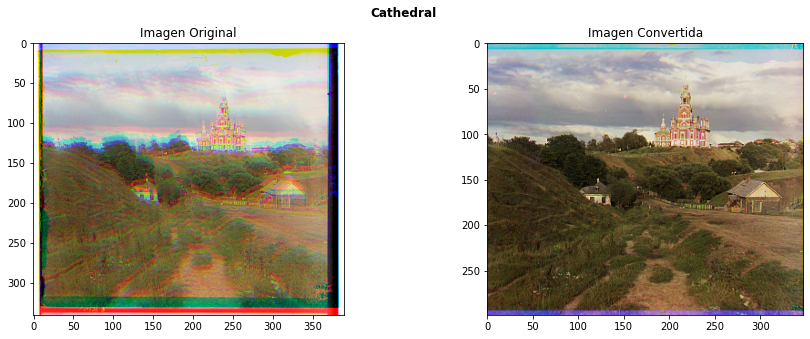

In [18]:
leer_imagen_convertir_jpg('Cathedral',i=1,h=0,v=20)

##  Tobolsk

El tiempo de ejecución es:  0.979


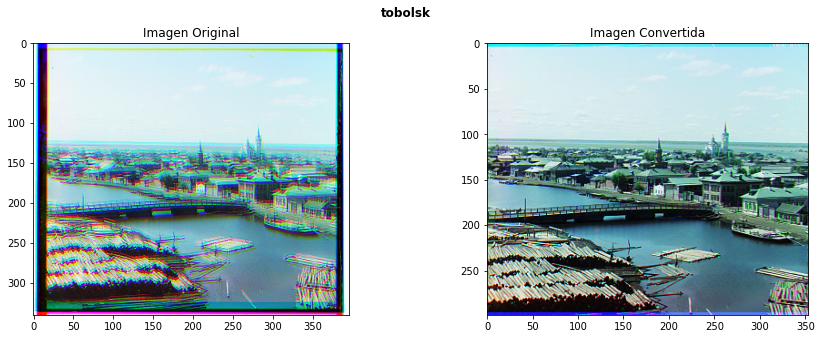

In [19]:
leer_imagen_convertir_jpg('tobolsk',i=1,h=0,v=20)

# Monastery

El tiempo de ejecución es:  0.7221


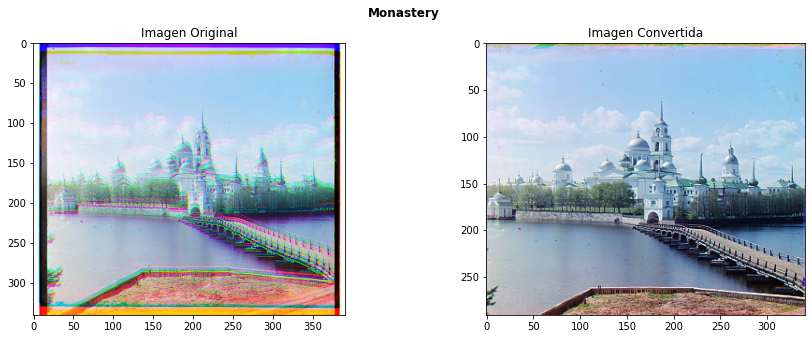

In [20]:
leer_imagen_convertir_jpg('Monastery',i=1,h=0,v=20)

# Imagenes con Alta resolución

In [14]:
#Limpia memoria para poder procesar imagenes pesadas
import gc
gc.collect()

4776

##  Harvesters

El tiempo de ejecución es:  18.1566


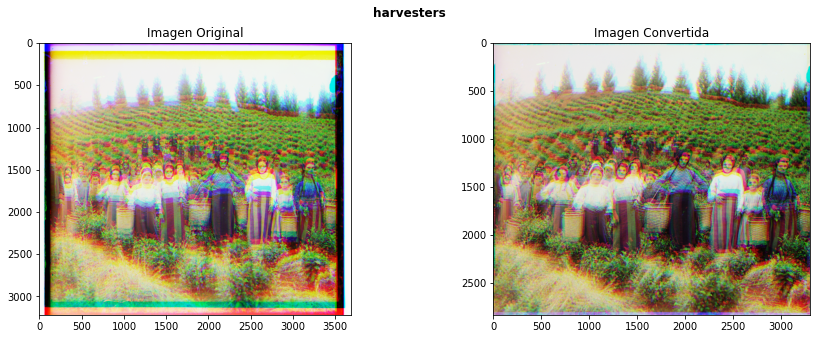

In [48]:
imc= leer_imagen_convertir_tif('harvesters',i=1,h=4,v=4)

##  Emir

El tiempo de ejecución es:  58.194


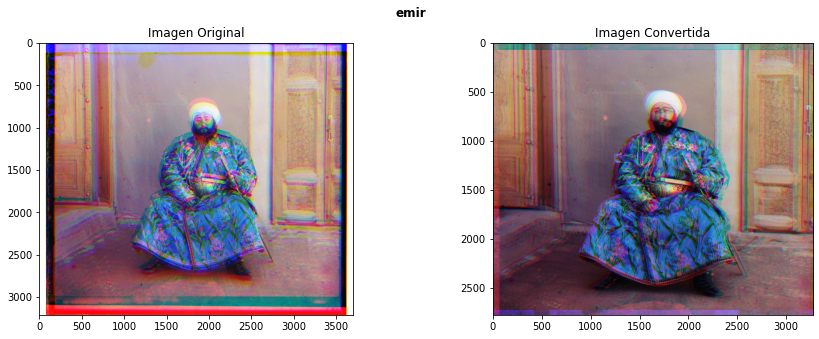

In [65]:
imc= leer_imagen_convertir_tif('emir',i=1,h=4,v=8)

##  Castle

El tiempo de ejecución es:  18.6276


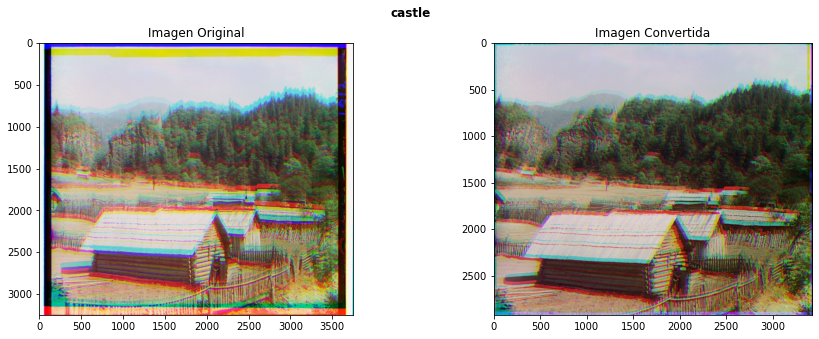

In [62]:
imc= leer_imagen_convertir_tif('castle',i=1,h=4,v=4)

## Icon

El tiempo de ejecución es:  18.7708


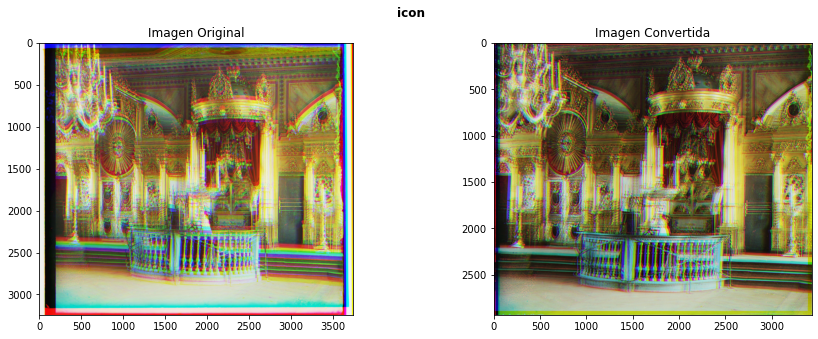

In [64]:
imc= leer_imagen_convertir_tif('icon',i=1,h=4,v=4)

## Lady

El tiempo de ejecución es:  80.4587


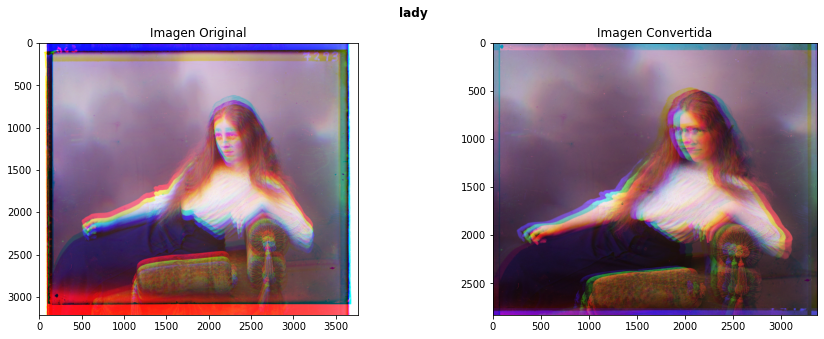

In [71]:
imc= leer_imagen_convertir_tif('lady',i=1,h=5,v=6)

## Melons


El tiempo de ejecución es:  39.0464


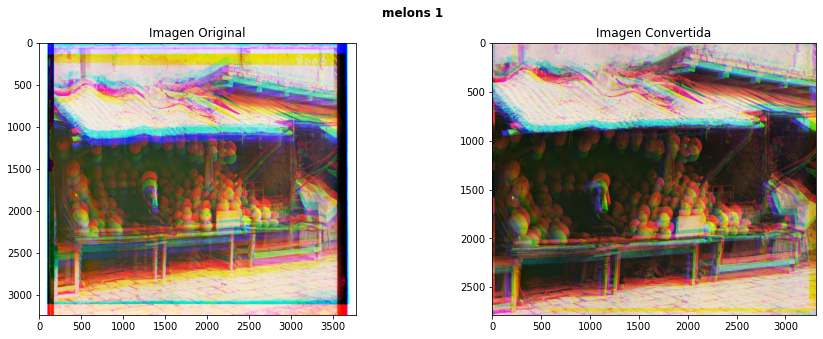

In [75]:
imc= leer_imagen_convertir_tif('melons 1',i=1,h=3,v=10)

## Onion Church


El tiempo de ejecución es:  17.3634


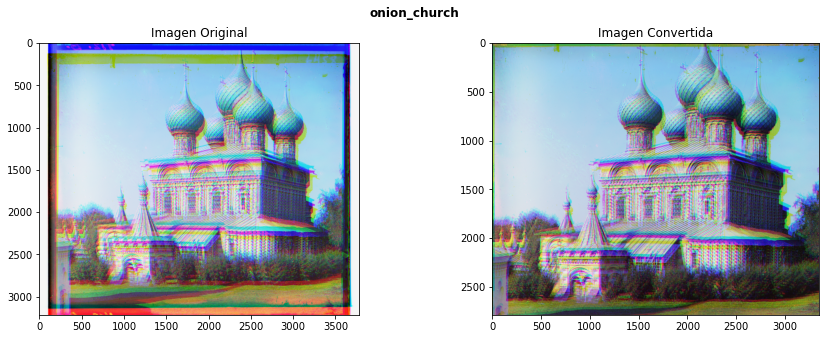

In [74]:
imc= leer_imagen_convertir_tif('onion_church',i=1,h=4,v=4)

## Sel Portrair


El tiempo de ejecución es:  62.9599


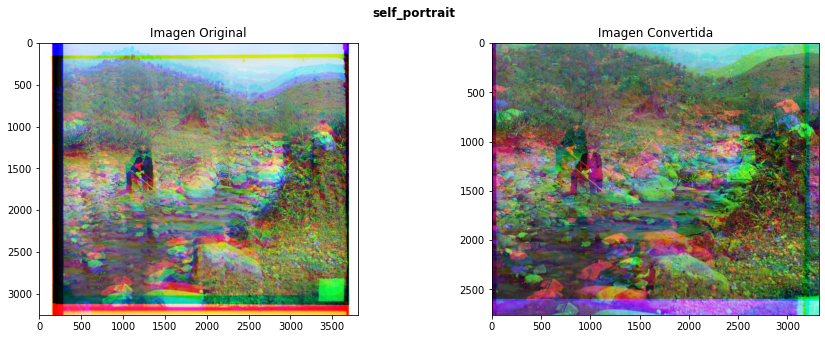

In [78]:
imc= leer_imagen_convertir_tif('self_portrait',i=1,h=4,v=4)

## Three Generations


El tiempo de ejecución es:  18.0245


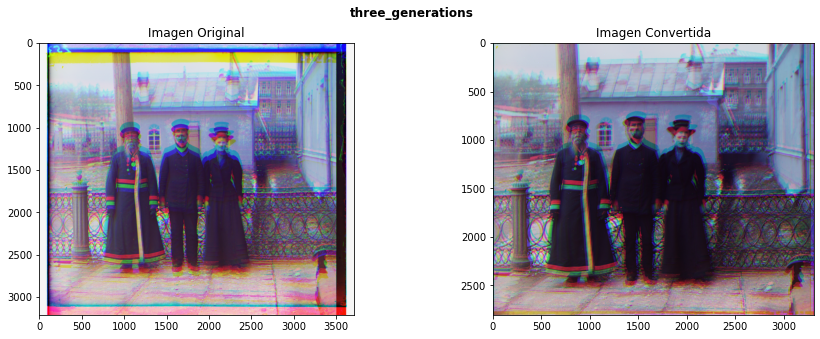

In [79]:
imc= leer_imagen_convertir_tif('three_generations',i=1,h=4,v=6)

## Train


El tiempo de ejecución es:  18.5943


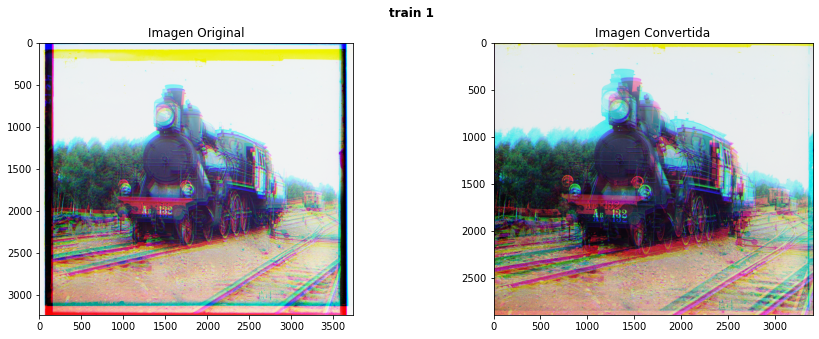

In [80]:
imc= leer_imagen_convertir_tif('train 1',i=1,h=4,v=4)

## Workshop


El tiempo de ejecución es:  21.8946


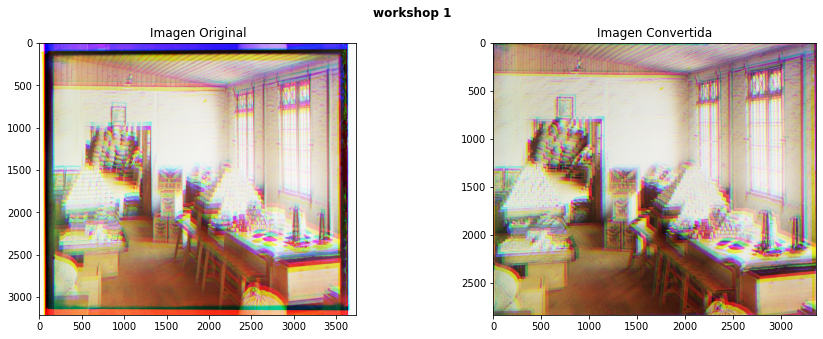

In [82]:
imc= leer_imagen_convertir_tif('workshop 1',i=1,h=4,v=4)